# Introduction

Text themselves cannot be used by machine learning models. They expect their input to be numeric. **So we need some way that can transform input text into numeric feature in a meaningful way.** There are several approaches for this and we’ll briefly go through some of them.

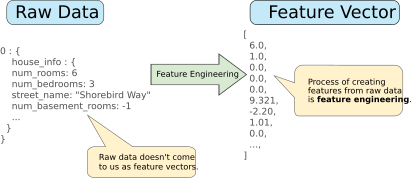

In [1]:
from IPython.display import display
from PIL import Image

# Example feature matrix
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images 2\\1 u4h9GqHMY1bwetBGLfdJTw.png"
display(Image.open(path))

**Basic feature extraction using text data**

1. Number of words
2. Number of characters
3. Average word length
4. Number of stopwords
5. Number of special characters
6. Number of numerics
7. Number of uppercase words

**Advanced Text Processing**

1. Binary encoding
2. Bag of Words (BoW)
3. Term Frequency-Inverse Document Frequency (TF-IDF)
4. Word Embedding
5. N-grams
6. Hashing Vectorizer

# Common Methods

This section presents some of the techniques to transform text into a numeric feature space. For this demonstration, I’ll use sklearn and spacy.

## 1) Binary Encoding

**A simple way we can convert text to numeric feature is via binary encoding.** In this scheme, we create a vocabulary by looking at each **distinct word in the whole dataset (corpus).** For each document, the output of this scheme will be a **vector of size N where N is the total number of words in our vocabulary.** Initially all entries in the vector will be **0**. If the word in the given document exists in the vocabulary then vector element at that position is set to **1**. 

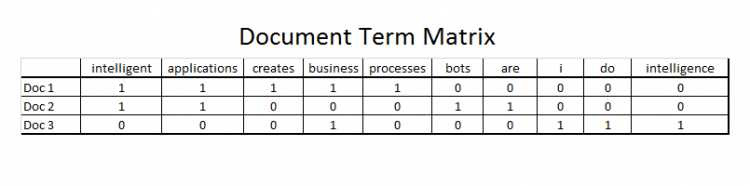

In [2]:
from IPython.display import display
from PIL import Image

# Example feature matrix (document-term matrix)
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\doc-term-matrix.jpg"
display(Image.open(path))

For the demo, let’s create some sample sentences.

In [4]:
# document, corpus
texts = [
    "blue car and blue window",
    "black crow in the window",
    "i see my reflection in the window"
]

Let’s implement this to understand. First we need to create the **vocabulary**.

In [5]:
vocab = sorted(set(word for sentence in texts for word in sentence.split()))
print(len(vocab), vocab)

12 ['and', 'black', 'blue', 'car', 'crow', 'i', 'in', 'my', 'reflection', 'see', 'the', 'window']


We have 12 distinct words in our entire corpus. So our vocabulary contains 12 words. After transforming, each document will be a vector of size 12.

In [7]:
import numpy as np
def binary_transform(text):
    # create a vector with all entries as 0
    output = np.zeros(len(vocab))
    # tokenize the input
    words = set(text.split())
    # for every word in vocab check if the doc contains it
    for i, v in enumerate(vocab):
        output[i] = v in words
    return output

The method is pretty simple. We are looping through each word in our vocabulary and setting the vector entry corresponding to that word to 1 if the input document contains it.

In [10]:
# Example input
print(binary_transform("i saw crow"))

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]


When we apply that function to our example input, it produced a vector of size 12 where two entries corresponding to vocabulary words crow and i are set to 1 while rest of them are zero. **Note that the word saw is not in the vocabulary and is completely ignored.** This is true for all the methods discussed below. So it is recommended that you have a sufficiently big corpus to build the vocabulary so that it contains as many words as possible.

**CountVectorizer**:

sklearn library already provides this functionality. **We can use CountVectorizer class to transform a collection of documents into the feature matrix.**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=True)
vec.fit(texts)
print([w for w in sorted(vec.vocabulary_.keys())])

['and', 'black', 'blue', 'car', 'crow', 'in', 'my', 'reflection', 'see', 'the', 'window']


**As you can see...**

The vocabulary does not contain the word i since sklearn by default ignores 1 character tokens but other than that, it looks exactly the same as the one before. Let’s visualize the transformation in a table. The columns are each word in the vocabulary and the rows represent the documents.

In [13]:
# we have 11 entries (if using CountVectorizer)
print([w for w in sorted(vec.vocabulary_.values())])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Binary representation of the corpus**

In [5]:
import pandas as pd
pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,1,0,1,1,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1,1
2,0,0,0,0,0,1,1,1,1,1,1


As expected, **we have a matrix of size 3 *12** and the entries are set to 1 accordingly. This is a simple representation of text and can be used in different machine learning models. However, many models perform much better with other techniques since **this does not capture any information other than if a word exists or not.**

## 2) Counting (Bag of Words BoW)

Counting is another approach to represent text as a numeric feature. It is similar to Binary scheme that we saw earlier but **instead of just checking if a word exists or not, it also checks how many times a word appeared.** In sklearn we can use CountVectorizer to transform the text.

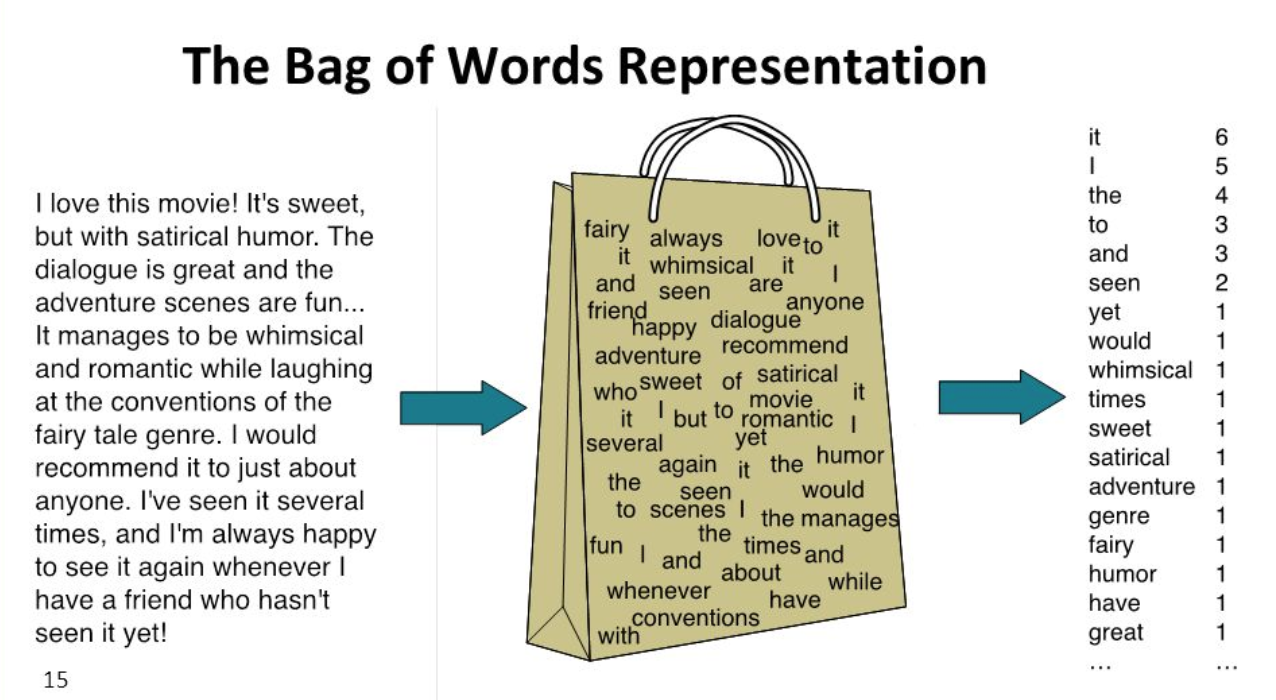

In [2]:
# Example feature matrix
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\BoW.png"
display(Image.open(path))

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=False) # we could ignore binary=False argument since it is default
vec.fit(texts)

X = vec.transform(texts)
pd.DataFrame(X.toarray(), columns=sorted(vec.vocabulary_.keys())) # .values() gives the index

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,1,0,2,1,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1,1
2,0,0,0,0,0,1,1,1,1,1,1


**Notes**:
    
- **CountVectorizer** is the module which is used to store the vocabulary based on fitting the words in it. This is imported from the sklearn
- Make the **object** using the class CountVectorizer.
- Data is **fit** in the object created from the class CountVectorizer.
- **Apply a bag of words approach** to count words in the data using vocabulary. If word or token is not available in the vocabulary, then such index position is set to zero.
- **Variable X is converted to an array** (method available for X). This will provide the count of each token in the sentence or list provided in Line 3

In the first sentence, “blue car and blue window”, the word blue appears twice so in the table we can see that for document 0, the entry for word blue has a value of 2. The output has a bit more information about the sentence than the one we get from Binary transformation since we also get to know how many times the word occurred in the document. **Essentially, we are giving each token a weight based on the number of occurrences.** But this weighing scheme not that useful for practical applications. **Words that occur frequently such has a, an, have etc. will have heigher weight than others.** Later in this series of posts, I’ll demonstrate its limitations when building a search engine.

**Shortcomings of Bag of Words method**

- **It ignores** the order of the word, for example, this is bad = bad is this.
- **It ignores** the context of words. Suppose If I write the sentence "He loved books. Education is best found in books". - It would create two vectors one for "He loved books" and other for "Education is best found in books." It would treat both of them orthogonal which makes them independent, but in reality, they are related to each othe

## 3) TF-IDF

**TF-IDF stands for term frequency-inverse document frequency.** We saw that Counting approach assigns weights to the words based on their frequency and it’s obvious that frequently occurring words will have higher weights. But these words might not be important as other words. For example, let’s consider an article about Travel and another about Politics. Both of these articles will contain words like a, the frequently. But words such as flight, holiday will occur mostly in Travel and parliament, court etc. will appear mostly in Politics. Even though these words appear less frequently than the others, they are more important. TF-IDF assigns more weight to less frequently occurring words rather than frequently occurring ones. **It is based on the assumption that less frequently occurring words are more important.**

TF-IDF consists of two parts:

1. **Term frequency** which is same as Counting method we saw before
2. **Inverse document frequency:** This is responsible for reducing the weights of words that occur frequently and increasing the weights of words that occur rarely.


**Formula to calculate tf-idf is:**

    tfidf(t, d, D) = tf(t, d) * idf(t, D)

where,

    t is a term (word)
    d is a document that this term is in
    D is a collection of all documents

In [20]:
# We use TfidfVectorizer to calculate tf-idf for each word
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer() # instantiate an object from the TfidfVectorizer class (constructer funciton)
vec.fit(texts) # fit the object to our data

import pandas as pd
pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))

,and,black,blue,car,crow,in,my,reflection,see,the,window
0,0.396875,0.000000,0.793749,0.396875,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.234400
1,0.000000,0.534093,0.000000,0.000000,0.534093,0.406192,0.00000,0.00000,0.00000,0.406192,0.315444
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.358291,0.47111,0.47111,0.47111,0.358291,0.278245


## 4) Word Embedding

Word Embedding is a technique for natural language processing. **The technique uses a neural network** model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, **Word Embedding represents each distinct word with a particular list of numbers called a vector.** The vectors are chosen carefully such that a simple mathematical function **(the cosine similarity between the vectors)** indicates the level of semantic similarity between the words represented by those vectors. 

**The underlying idea here is that similar words will have a minimum distance between their vectors.** For example fruits like apple, mango, banana should be placed close whereas books will be far away from these words. In a broader sense, word embedding will create the vector of fruits which will be placed far away from vector representation of books.

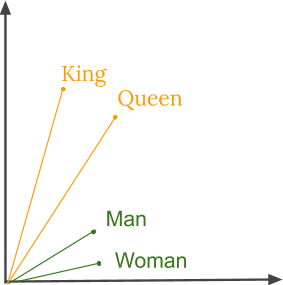

In [5]:
# distance between vectors
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\word2vec.png"
display(Image.open(path))

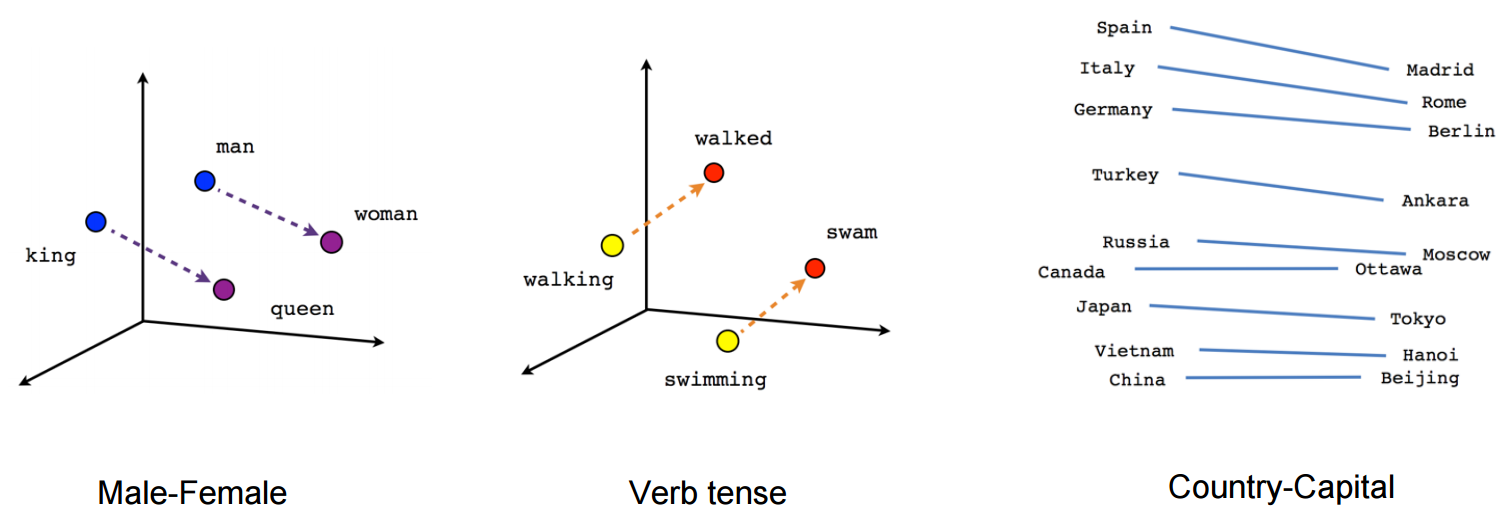

In [7]:
# Visualise the embeddings (wordgraph)
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\wordgraph.png"
display(Image.open(path))

### Techniques of Word Embedding

Here’s a summary of techniques used to create embeddings:

- **Word2vec (Google) -** 2 techniques: Continuous Bag of Words (CBoW) and Skip-Gram;
- **Global Vectors** or GloVe (Stanford);
- **fastText (Facebook) —** interesting fact: accounts for out of vocabulary words.

### Word2Vec models

**Word2vec** is a group of related models that are used to produce word embeddings. These models are **shallow, two-layer neural networks** that are trained to reconstruct linguistic contexts of words. **Word2vec takes as its input a large corpus of text and produces a vector space,** typically of several hundred dimensions, with **each unique word in the corpus being assigned a corresponding vector** in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

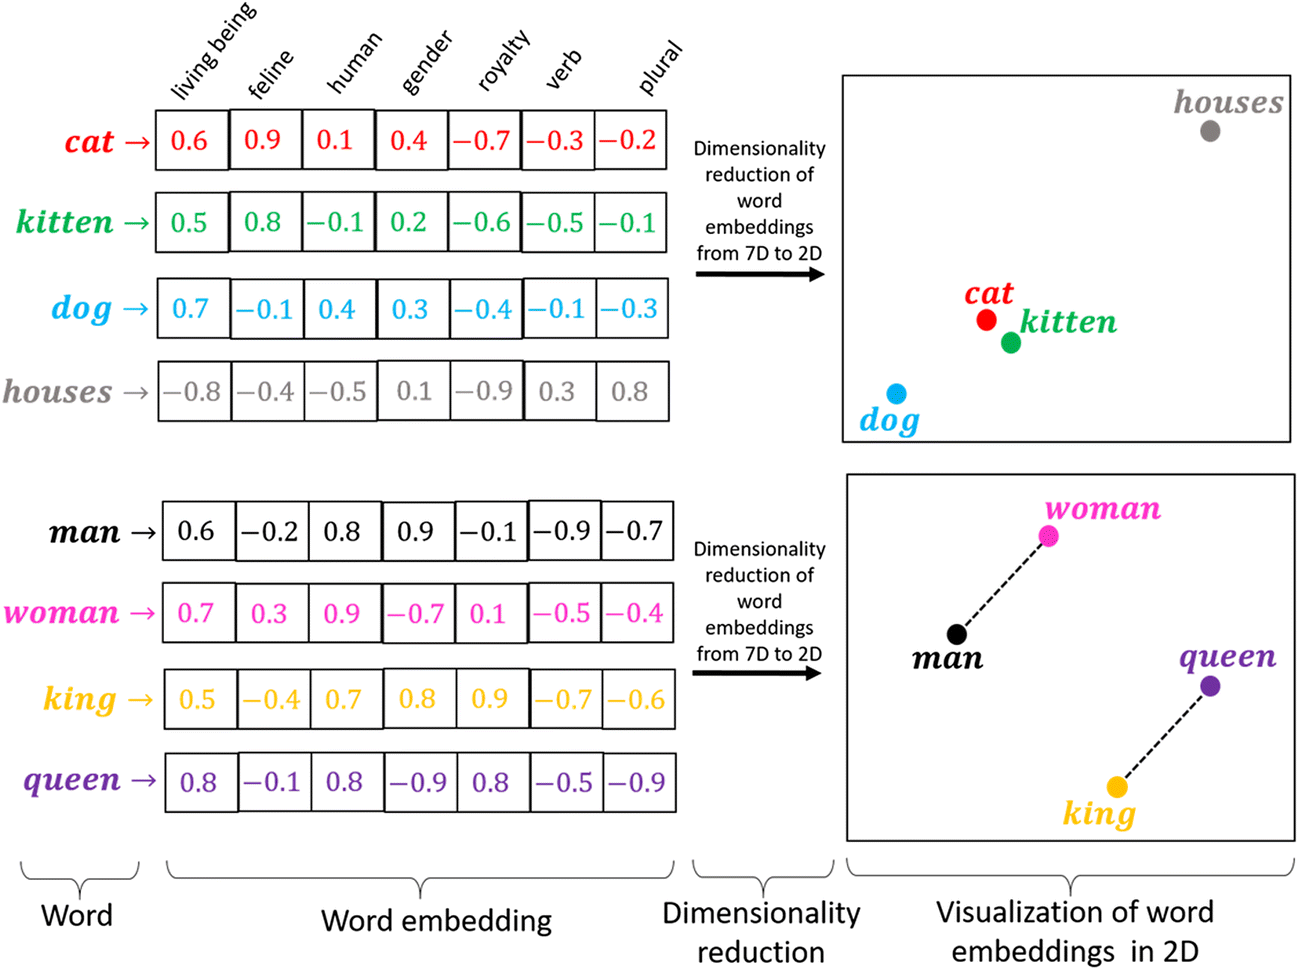

In [10]:
# Training Word2vec (with vector sizee =7)
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\Training Word2vec.png"
display(Image.open(path))

These techiques proposes two methods for learning representations of words:

1. **Continuous Bag-of-Words CBOW** Model which predicts the middle word based on surrounding context words. The context consists of a few words before and after the current (middle) word. This architecture is called a bag-of-words model as the order of words in the context is not important.
2. **Skip-gram** Model which predict words within a certain range before and after the current word in the same sentence. A worked example of this is given below.

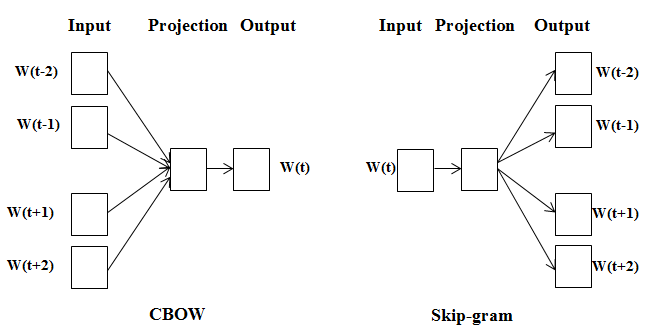

In [9]:
# Two word2vec models for obtaining word embeddings
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\CBOW-vs-skipgram.png"
display(Image.open(path))

**For example,** consider the sentence: **“I have failed at times but I never stopped trying”.**  Let’s say we want to learn the embedding of the word **“failed”**. So, here the focus word is “failed”.

1. **The first step** is to define a context window.

2. **A context window** refers to the number of words appearing on the left and right of a focus word. The words appearing in the context window are known as neighboring words (or context). Let’s fix the context window to 2 and then input and output pairs for both approaches:

    - Continuous Bag-of-Words: Input = [ I, have, at, times ],  Output = failed
    - Skip-gram: Input = failed, Output = [I, have, at, times ]

3. **As you can see here,** CBOW accepts multiple words as input and produces a single word as output, whereas Skip-gram accepts a single word as input and produces multiple words as output.

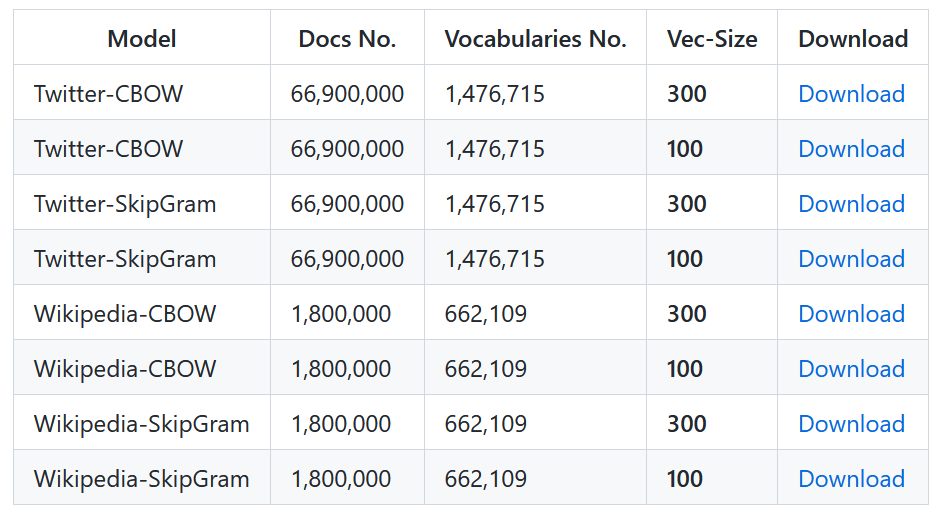

In [11]:
# CBOW and SkipGram trained on different data
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\aravect.png"
display(Image.open(path))

### Example: A pre-trainined Glove model

Here, we will use pre-trained word vectors (glove.6B.100d) which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the **100-dimensional version** of the model.

In [1]:
# The first step here is to convert it into the word2vec format

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'C:/projects/datasets/glove.6B.100d.txt' # import it as text
word2vec_output_file = 'C:/projects/datasets/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file) #convert text to 'glove word2vec'

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  after removing the cwd from sys.path.


(400000, 100)

In [2]:
# Now, we can load the above word2vec file as a model
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'C:/projects/datasets/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our tweet contains a text saying **‘go away’.** We want to convert this entire string into a vector. We can easily obtain it’s word vector using the above model:

In [3]:
# each word is represented as 100 dimensions
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [4]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.

In [5]:
# Vector representation of 'go away'
(model['go'] + model['away'])/2

array([-0.091342  ,  0.223404  ,  0.58856   , -0.614765  , -0.0838365 ,
        0.5387    , -0.43531   ,  0.349125  ,  0.163308  , -0.28223   ,
        0.53547   ,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.553275  ,  0.385575  ,
        0.565335  ,  0.805405  ,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543   , -0.571035  , -0.59926   ,  0.422585  , -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.381435  , -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55665   , -0.32982   ,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332   ,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895   , -0.33707   ,  0.083195  ,  1.86185   ,  0.283465  ,
       -0.13081   ,  0.927795  , -0.37028   ,  0.1885465 ,  0.66198   ,
        0.505175  ,  0.37748498,  0.1322995 , -0.380375  , -0.02

We have converted the entire string into a vector which can now be used as a feature in any modelling technique.

## 5) N-Grams

**Some English words** occur together more frequently. For example - Sky High, do or die, best performance, heavy rain etc. So, in a text document we may need to identify such pair of words which will help in sentiment analysis. First, we need to generate such word pairs from the existing sentence maintain their current sequences. Such pairs are called bigrams. Python has a bigram function as part of NLTK library which helps us generate these pairs.

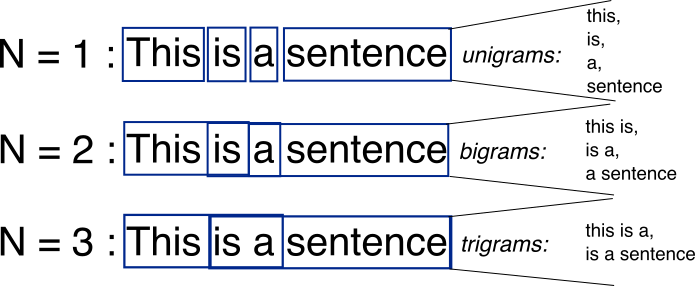

In [13]:
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images\\n-gram.png"
display(Image.open(path))

In [14]:
import nltk

word_data = "The best performance can bring in sky high success."
nltk_tokens = nltk.word_tokenize(word_data)

print(list(nltk.bigrams(nltk_tokens)))

[('The', 'best'), ('best', 'performance'), ('performance', 'can'), ('can', 'bring'), ('bring', 'in'), ('in', 'sky'), ('sky', 'high'), ('high', 'success'), ('success', '.')]


This result can be used in statistical findings on the frequency of such pairs in a given text. That will corelate to the general sentiment of the descriptions present int he body of the text. 

## 6) Hashing Vectorizer

There are two main issues with the CountVectorizer and TdidfVectorizer:
1. **First,** the vocabulary size can grow so much so as not to fit in the available memory for large corpus. In such a case, we need two passes over data. If we were to distribute the vectorization task to several computers, then we will need to synchronize vocabulary building across computing nodes. 
2. **Second:** the other issue arises in the context of an online text classifier built using the count vectorizer, for example spam classifier which needs to decide whether an incoming email is spam or not. When such a classifier encounters words not in its vocabulary, it ignores them. A spammer can take advantage of this by deliberately misspelling words in its message which when ignored by the **spam filter** will cause the spam message appear normal.  

The HashingVectorizer overcomes these limitations.

**The HashingVectorizer** is based on feature hashing, also known as the hashing trick. Unlike the CountVectorizer where the index assigned to a word in the document vector is determined by the alphabetical order of the word in the vocabulary, the HashingVectorizer maintains no vocabulary and determines the index of a word in an array of fixed size via **hashing.** Since no vocabulary is maintained, the presence of new or misspelled words doesn’t create any problem. Also the hashing is done on the fly and memory need is diminshed.

**Hashing** is a way of converting a key into an address of a table, known as the hash table.

### Example

In [27]:
from sklearn.feature_extraction.text import HashingVectorizer
import pandas as pd
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]


vectorizer = HashingVectorizer(n_features=16) # choose an arbitrary fixed length vector
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


In [28]:
print(X.toarray())

[[-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]
 [-0.81649658  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.40824829
   0.          0.40824829  0.          0.        ]
 [ 0.          0.          0.          0.         -0.70710678  0.70710678
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]]


In [17]:
Doc_Term_Matrix = pd.DataFrame(X.toarray())
Doc_Term_Matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.577350,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.57735,0.0,0.0,0.000000,0.0,0.577350,0.0,0.0
1,-0.816497,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.408248,0.0,0.408248,0.0,0.0
2,0.000000,0.0,0.0,0.0,-0.707107,0.707107,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,-0.577350,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.57735,0.0,0.0,0.000000,0.0,0.577350,0.0,0.0


You will note that column headings are integer numbers referring to hash table locations.

**However,** you can as well make the number of features = 10000

In [20]:
vectorizer = HashingVectorizer(n_features=10000)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
Doc_Term_Matrix = pd.DataFrame(X.toarray())
Doc_Term_Matrix

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4 documents, and a 10,000 column matrix. In this example, most of the columns would be empty as the dataset is really small.

### Same Results With CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cvectorizer = CountVectorizer()

# compute counts without any term frequency normalization
X = cvectorizer.fit_transform(corpus)
print(X.shape)

(4, 9)


Notice that instead of (4,10000) as in the HashingVectorizer example, you see (4, 9). This is because we did not force a matrix size with CountVectorizer. The matrix size is based on how many unique tokens were found in your vocabulary, where in this case it is 9.

### CountVectorizer vs. HashingVectorizer

HashingVectorizer and CountVectorizer are meant to do the same thing. Which is to convert a collection of text documents to a matrix of token occurrences. The difference is that HashingVectorizer does not store the resulting vocabulary (i.e. the unique tokens).

**The benefit** of not storing the vocabulary (dictionary of tokens) is two folded. First, this is very efficient for a large dataset.

**The downside** of doing this is that it will not be possible to retrieve the actual token given the column position. This would be especially important in tasks like keyword extraction, where you want to retrieve and use the actual tokens.

### When to use HashingVectorizer?

f you are using a large dataset for your machine learning tasks and you have no use for the resulting dictionary of tokens, then HashingVectorizer would be a good candidate.

However, if you worry about hash collisions (which is bound to happen if the size of your matrix is too small), then  you might want to stick to CountVectorizer until you feel that you have maxed out your computing resources and it’s time to optimize. Also, if you need access to the actual tokens, then again CountVectorizer is the more appropriate choice.